In [81]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [82]:
import numpy as np
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [83]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [84]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [85]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [86]:
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')


Number of rows: 768
Number of columns: 9


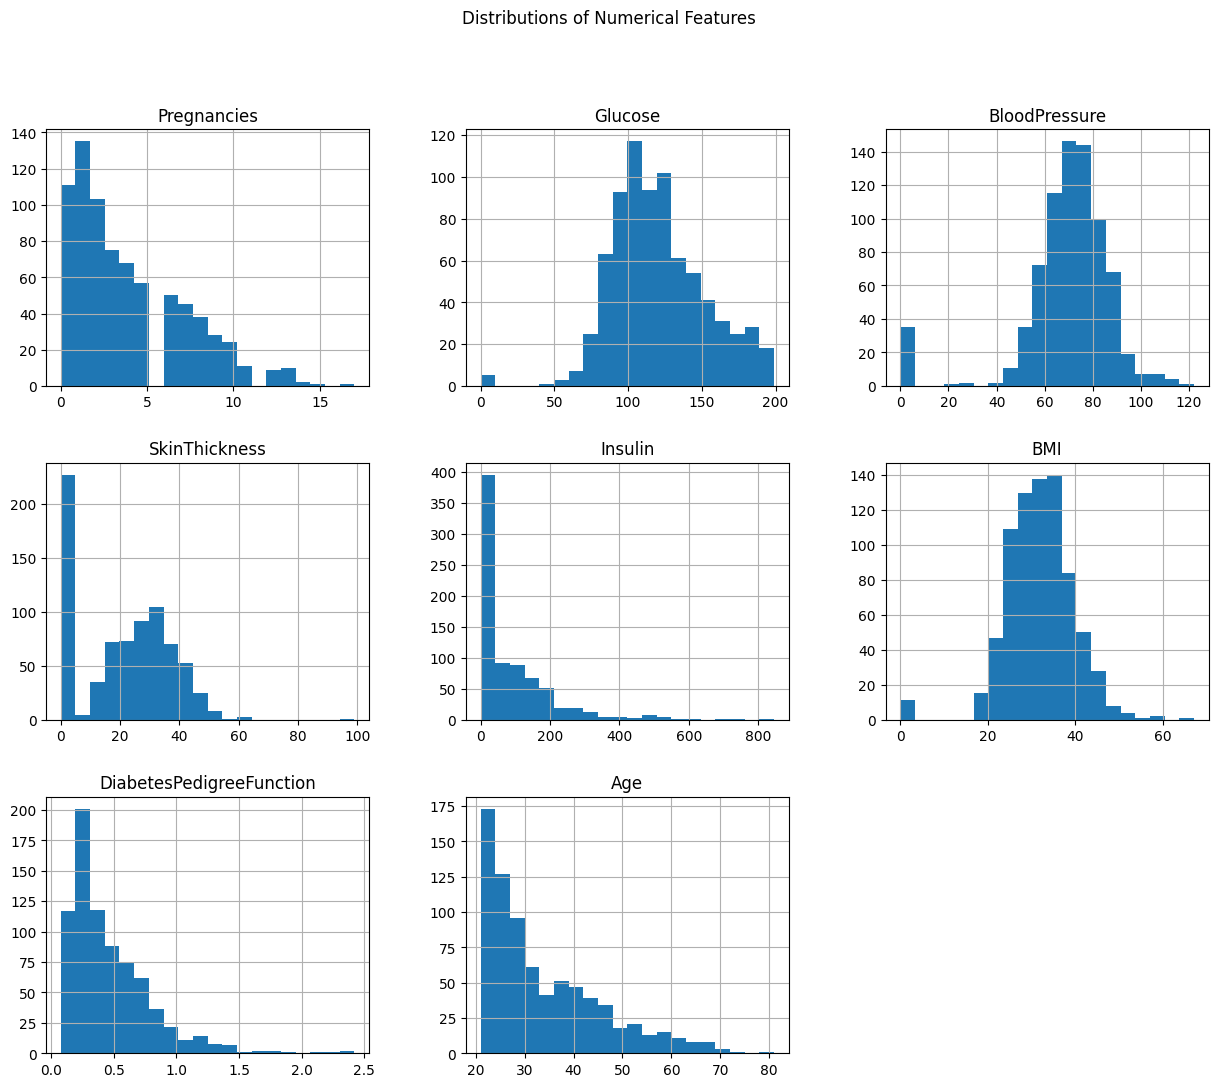

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_features = df.drop(columns=['Outcome'])  # Exclude the target variable
numerical_features.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distributions of Numerical Features')
plt.show()

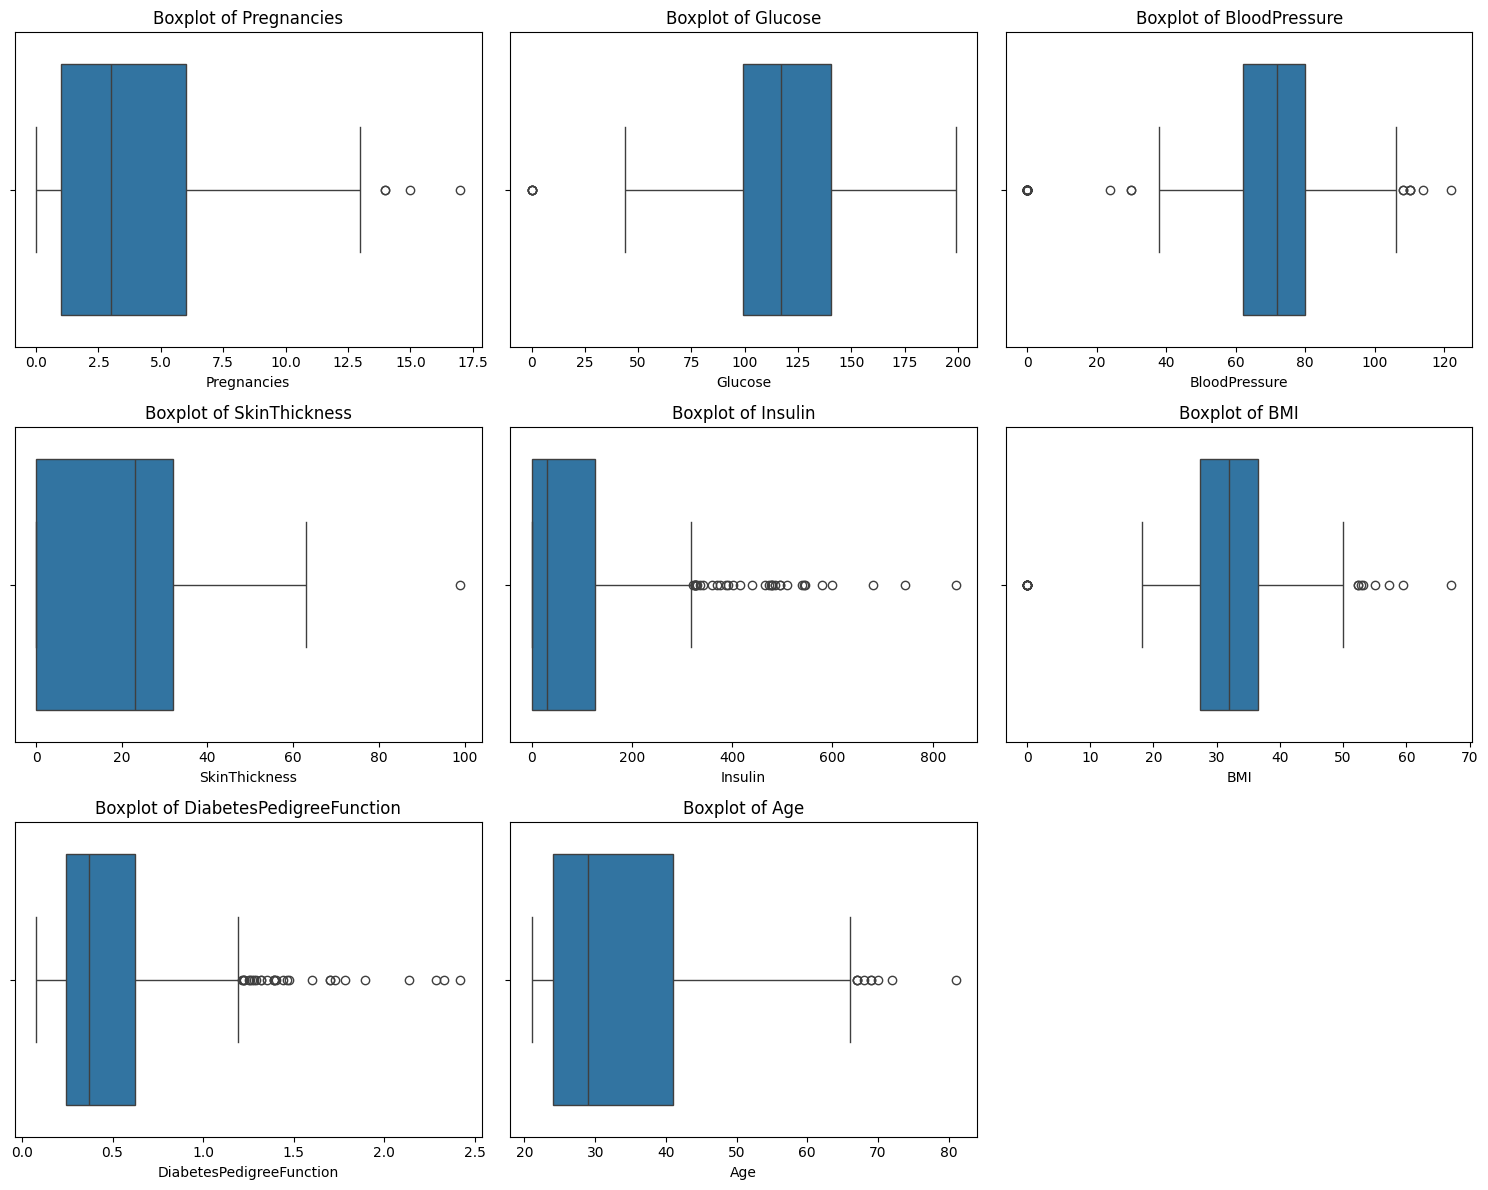

In [88]:
 #Boxplots for numerical features to visualize the spread and detect outliers
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the layout to fit all subplots
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

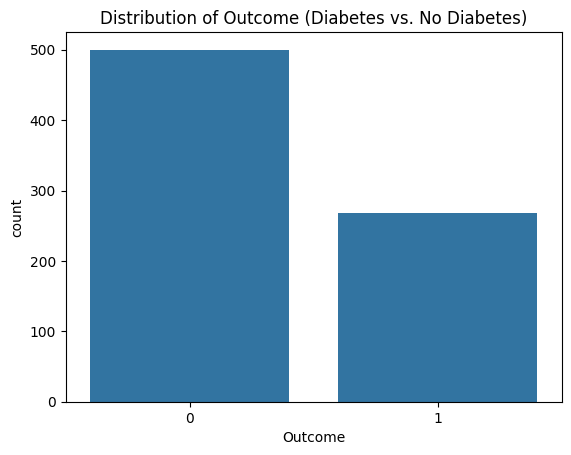

In [89]:
# Count plot for the target variable (Outcome)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Diabetes vs. No Diabetes)')
plt.show()

In [90]:
missing_values = df.isnull().sum()
print("\nMissing Values per Feature:")
print(missing_values)


Missing Values per Feature:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [91]:
from scipy.stats import zscore

# Calculate the Z-scores of each numerical feature
z_scores = zscore(df[numerical_features.columns])

# Identify rows where any feature has a Z-score > 3 (a common threshold for outliers)
outliers = (z_scores > 3).sum(axis=1)

# Display the rows with outliers (if any)
outlier_rows = df[outliers > 0]
print("\nRows with Outliers:")
print(outlier_rows)



Rows with Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
45             0      180             66             39        0  42.0   
58             0      146             82              0        0  40.5   
88            15      136             70             32      110  37.1   
111            8      155             62             26      495  34.0   
123            5      132             80              0        0  26.8   
153            1      153             82             42      485  40.6   
159           17      163             72             41      114  40.9   
177            0      129            110             46      130  67.1   
186            8      181             68             36      495  30.1   
220            0 

In [92]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# Check for unrealistic values (e.g., BMI or age less than 0, glucose levels below a threshold)
unrealistic_values = df[(df['BMI'] <= 0) | (df['Age'] <= 0) | (df['Glucose'] <= 0)]
print("\nUnrealistic Values:")
print(unrealistic_values)



Number of Duplicate Rows: 0

Unrealistic Values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
9              8      125             96              0        0   0.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
75             1        0             48             20        0  24.7   
81             2       74              0              0        0   0.0   
145            0      102             75             23        0   0.0   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
371            0      118             64             23       89   0.0   
426            0       94              0              0        0   0.0   
494            3       80              0              0       

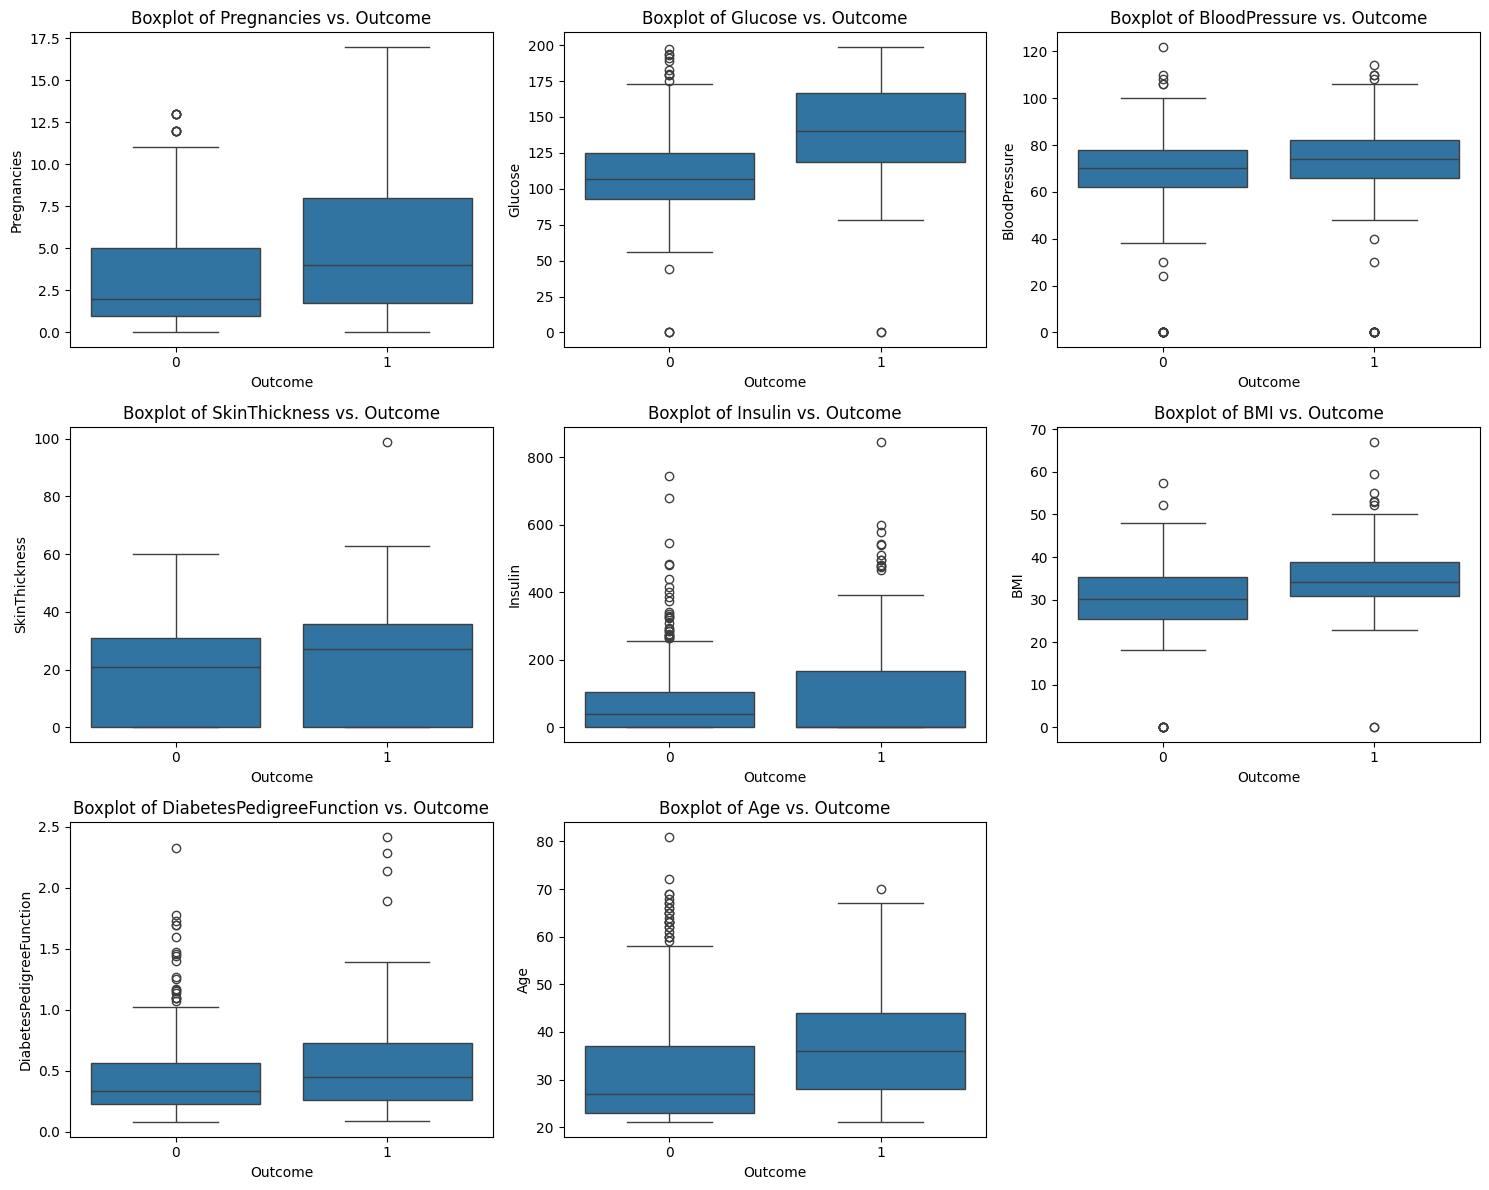

In [93]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure for multiple subplots
plt.figure(figsize=(15, 12))

# Boxplots for numerical features vs. target variable (Outcome)
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(3, 3, i)  # Adjust layout to fit all subplots
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs. Outcome')

plt.tight_layout()
plt.show()

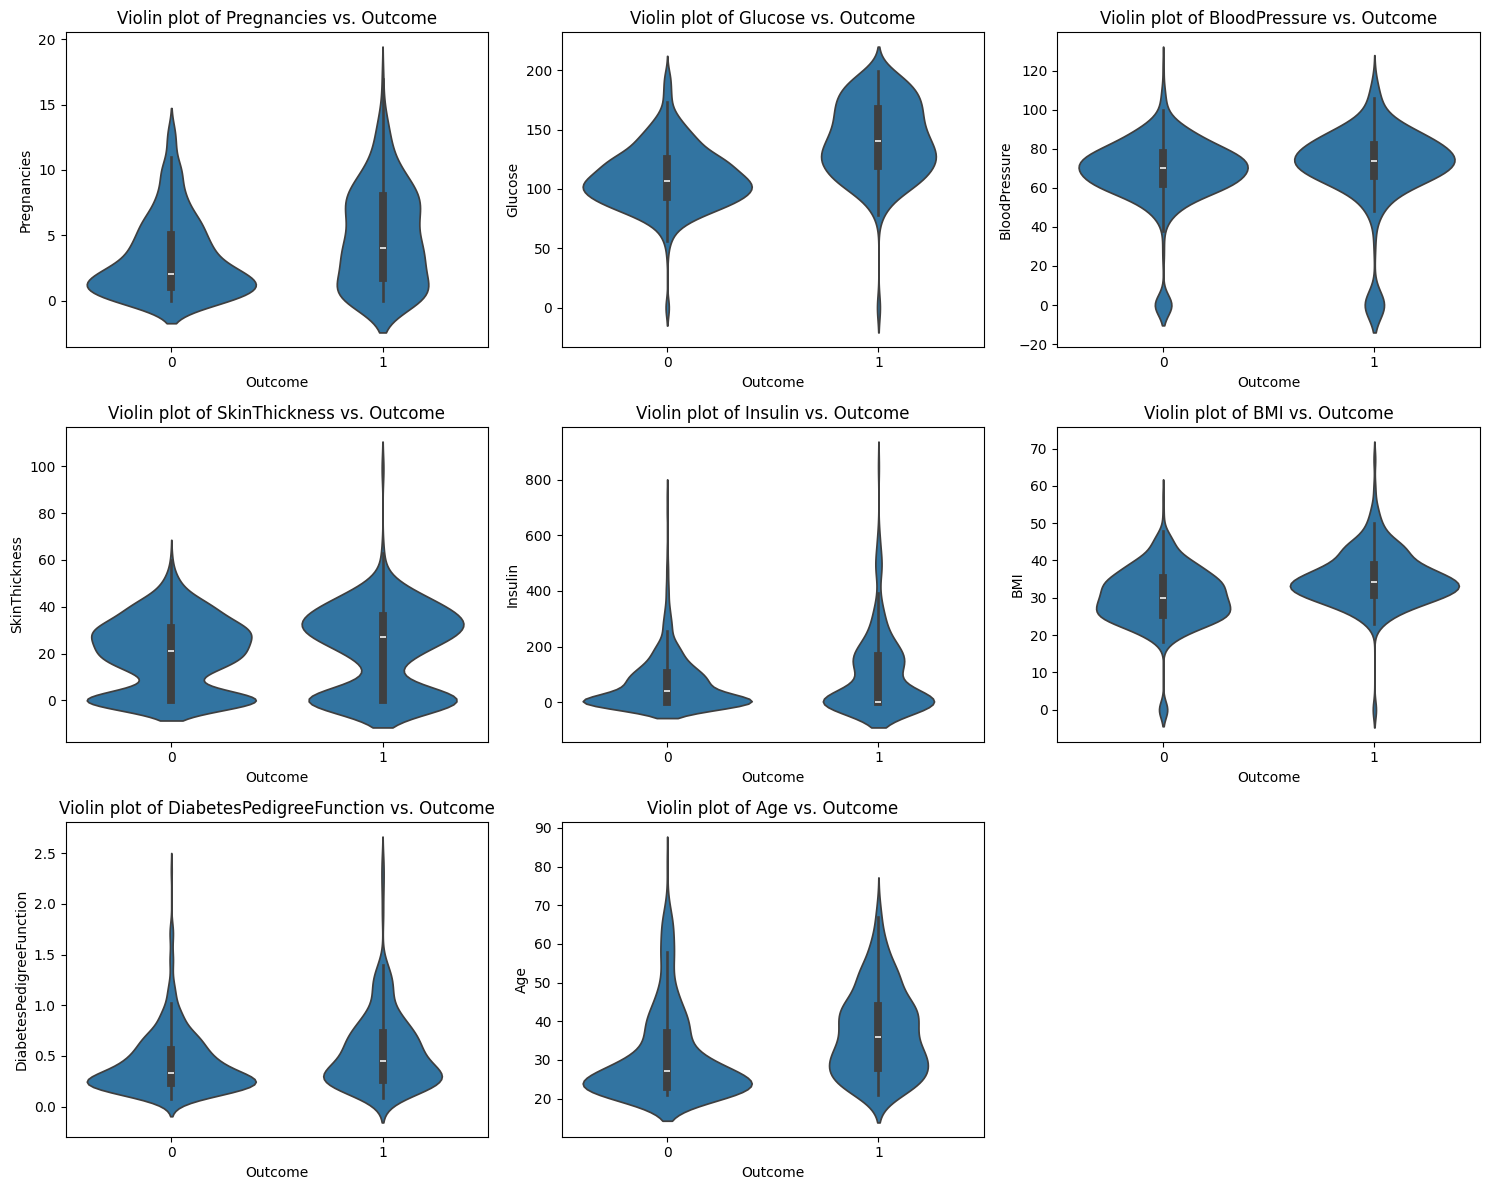

In [94]:
# Violin plots to compare distributions for each class of Outcome
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Outcome', y=feature, data=df)
    plt.title(f'Violin plot of {feature} vs. Outcome')

plt.tight_layout()
plt.show()

In [95]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
# If missing values exist, handle them
# Option 1: Drop rows with missing values
# df.dropna(inplace=True)

# Option 2: Fill missing values with mean/median/mode
# For numerical columns
# df['column_name'].fillna(df['column_name'].median(), inplace=True)

# For categorical columns
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [96]:
# Handle inconsistent data (e.g., negative values in BMI, Age, and Glucose)
df = df[(df['BMI'] > 0) & (df['Age'] > 0) & (df['Glucose'] > 0)]

# Optionally, you can replace these values with median or mean if you don't want to remove them
# df['BMI'] = df['BMI'].replace(df[df['BMI'] <= 0]['BMI'], df['BMI'].median())
# df['Age'] = df['Age'].replace(df[df['Age'] <= 0]['Age'], df['Age'].median())
# df['Glucose'] = df['Glucose'].replace(df[df['Glucose'] <= 0]['Glucose'], df['Glucose'].median())

# Check the shape of the dataset after handling inconsistencies
print("\nDataset Shape After Removing Inconsistent Data:", df.shape)



Dataset Shape After Removing Inconsistent Data: (752, 9)


In [97]:

# #Handling Outliers
# from scipy.stats import zscore

# # Calculate Z-scores for numerical features
# z_scores = zscore(df[numerical_columns])

# # Identify outliers (Z-score > 3 or < -3)
# outliers = (z_scores > 3) | (z_scores < -3)

# # Remove rows with outliers (you can also choose to cap them instead of removing)
# df_no_outliers = df[~outliers.any(axis=1)]

# # Check the shape of the dataset after removing outliers
# print("\nDataset Shape After Removing Outliers:", df_no_outliers.shape)


In [98]:
# Check if there are any categorical columns (besides the target column)
categorical_columns = df.select_dtypes(include=['object']).columns

# One-Hot Encoding if categorical columns are found
if len(categorical_columns) > 0:
    df = pd.get_dummies(df, drop_first=True)  # drop_first to avoid multicollinearity
    print("\nDataset After One-Hot Encoding:")
    print(df.head())
else:
    print("\nNo Categorical Columns Found for Encoding.")



No Categorical Columns Found for Encoding.


In [99]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to scale numerical features
scaler = StandardScaler()

# Standardize numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the dataset after scaling
print("\nDataset After Scaling/Standardization:")
print(df.head())



Dataset After Scaling/Standardization:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.637110  0.852119       0.125352       0.897278 -0.702200  0.165409   
1    -0.845274 -1.207994      -0.202336       0.520391 -0.702200 -0.845521   
2     1.230064  1.996626      -0.311566      -1.301229 -0.702200 -1.322102   
3    -0.845274 -1.077194      -0.202336       0.143504  0.109209 -0.628893   
4    -1.141751  0.492416      -1.622320       0.897278  0.747977  1.537386   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.466671  1.426086  1.359590  
1                 -0.369975 -0.197622 -0.735516  
2                  0.603081 -0.112164  1.359590  
3                 -0.927739 -1.052206 -0.735516  
4                  5.501706 -0.026706  1.359590  


In [100]:
# # Feature Engineering: BMI to Age Ratio (new feature)
# df['BMI_to_Age_Ratio'] = df['BMI'] / df['Age']

# # Check the dataset after feature engineering
# print("\nDataset After Feature Engineering (BMI-to-Age Ratio):")
# print(df.head())


In [101]:
#Code for Splitting the Dataset and Initializing the Model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = df['Outcome']  # Target variable ('Outcome')

# Step 2: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # max_iter to handle convergence issues for large datasets

# Output confirmation
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (601, 8)
Test set size: (151, 8)


In [102]:
# Check the unique values in the target variable (Outcome)
print(y.unique())

# If necessary, convert 'Outcome' to a categorical variable
y = y.astype(int)  # Ensure it is in integer format (0 or 1)


[ 1.35958996 -0.73551588]


In [103]:
# Check if there are any unexpected values or NaNs in 'Outcome'
print(y.value_counts())  # Show the counts of unique values in Outcome

# If there are NaNs or unexpected values, you may want to handle them:
y = y.fillna(0)  # Replace NaNs with 0 if any (adjust according to your needs)


Outcome
0    488
1    264
Name: count, dtype: int64


In [104]:
# Check the unique values in y_train after splitting
print(y_train.unique())


[-0.73551588  1.35958996]


In [105]:
# Make sure that 'Outcome' (y) is of type int and contains only binary values (0 or 1)
y_train = y_train.astype(int)

# Check if there are any other unexpected values (if any non-binary value exists)
print(y_train.value_counts())  # Should show values 0 and 1 only

# If necessary, handle any unexpected values
y_train = y_train.apply(lambda x: 0 if x != 1 else 1)  # This ensures it's either 0 or 1


Outcome
0    397
1    204
Name: count, dtype: int64


In [106]:
# Train the Logistic Regression model with the preprocessed training data
logreg.fit(X_train, y_train)
print("Model trained successfully!")


Model trained successfully!


In [107]:
from sklearn.model_selection import GridSearchCV

# Step 2: Define the hyperparameter grid to tune the model
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Optimization solvers
}

# Step 3: Initialize the GridSearchCV object with Logistic Regression
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Step 4: Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Step 5: Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


Best Hyperparameters: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7654132231404958


In [108]:
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')


Number of rows: 752
Number of columns: 9


In [109]:
# Step 1: Make predictions on the test data
y_pred = logreg.predict(X_test)

# Output the predicted values
print("Predictions on test data:", y_pred)


Predictions on test data: [1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 1]


In [110]:
# Ensure y_test and y_pred are of the correct type (binary)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Now proceed to evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# AUC (Area Under Curve) for ROC (Receiver Operating Characteristic)
# First, calculate the probabilities for the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC (Area Under Curve): {roc_auc:.4f}")


Accuracy: 0.7748

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        91
           1       0.78      0.60      0.68        60

    accuracy                           0.77       151
   macro avg       0.78      0.75      0.75       151
weighted avg       0.78      0.77      0.77       151


Confusion Matrix:
[[81 10]
 [24 36]]

AUC (Area Under Curve): 0.8557


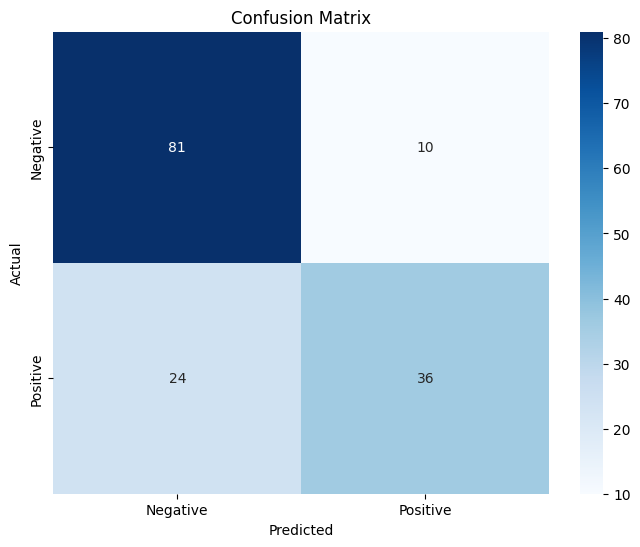

In [111]:
#Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


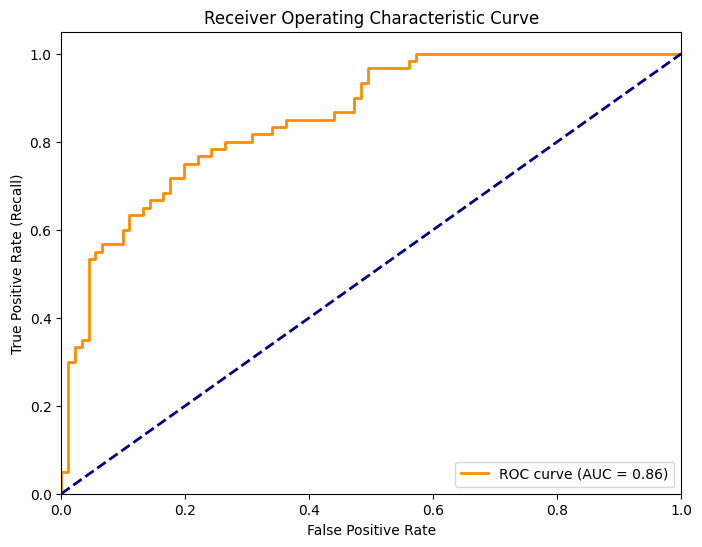

In [112]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class (class 1)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


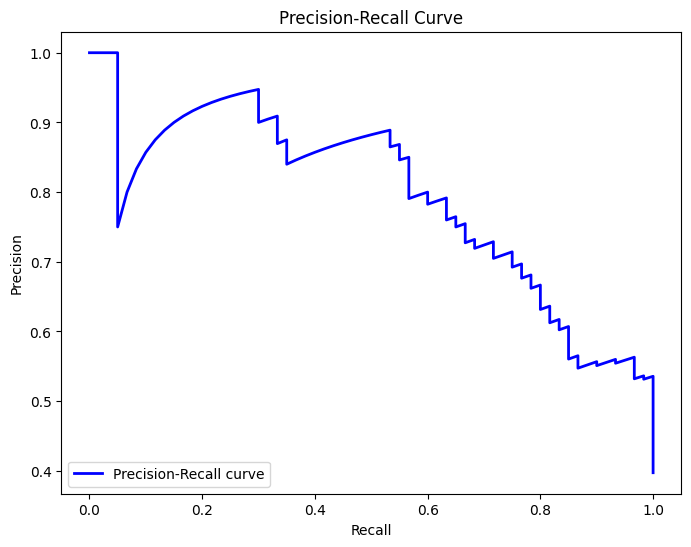

In [113]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Get the precision-recall curve data
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


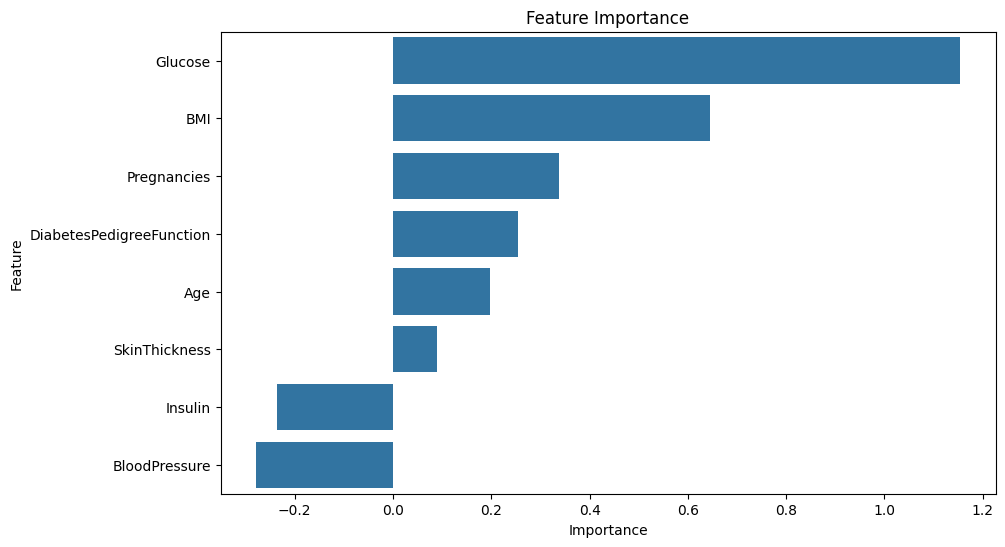

In [114]:
# Get feature importance from Logistic Regression coefficients
feature_importance = logreg.coef_[0]

# Create a DataFrame for better visualization
import pandas as pd

feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.show()


In [115]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Train a Dummy Classifier as a baseline
dummy_clf = DummyClassifier(strategy='most_frequent')  # Predicts the most frequent class
dummy_clf.fit(X_train, y_train)

# Step 2: Make predictions with the Dummy Classifier
y_pred_dummy = dummy_clf.predict(X_test)

# Step 3: Evaluate the Dummy Classifier's performance
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, zero_division=0)  # Avoid undefined precision
recall_dummy = recall_score(y_test, y_pred_dummy, zero_division=0)  # Avoid undefined recall
f1_dummy = f1_score(y_test, y_pred_dummy, zero_division=0)  # Avoid undefined F1 score

# Print the Dummy Classifier metrics
print("Dummy Classifier Metrics:")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"Precision: {precision_dummy:.4f}")
print(f"Recall: {recall_dummy:.4f}")
print(f"F1 Score: {f1_dummy:.4f}")


Dummy Classifier Metrics:
Accuracy: 0.6026
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


In [116]:
# Step 4: Evaluate your trained Logistic Regression model's performance
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)

# Print the Logistic Regression metrics
print("\nLogistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1 Score: {f1_logreg:.4f}")


Logistic Regression Model Metrics:
Accuracy: 0.7748
Precision: 0.7826
Recall: 0.6000
F1 Score: 0.6792


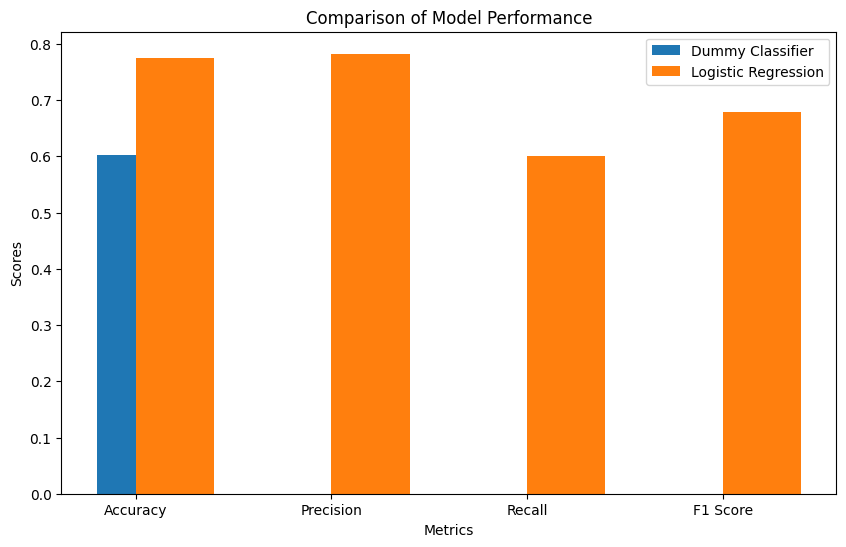

In [117]:
import matplotlib.pyplot as plt

# Create a comparison of metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dummy_scores = [accuracy_dummy, precision_dummy, recall_dummy, f1_dummy]
logreg_scores = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]

# Plotting the comparison
plt.figure(figsize=(10,6))
x = range(len(metrics))
plt.bar(x, dummy_scores, width=0.4, label='Dummy Classifier', align='center')
plt.bar(x, logreg_scores, width=0.4, label='Logistic Regression', align='edge')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(x, metrics)
plt.legend()
plt.show()


In [118]:
import joblib
joblib.dump(logreg, "logreg.joblib")

['logreg.joblib']

In [119]:
pip install uvicorn

Note: you may need to restart the kernel to use updated packages.
